In [1]:
import pandas as pd
import numpy as np
import math
import random
import csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from time import time

In [2]:
url = "D:\\TUGAS AKHIR\\Data TA\\Australian fraud dataset\\australian.csv"
colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14', 'y']
data = pd.read_csv(url, header = None, names = colnames)
X = data.drop('y', axis = 1)
X = (X-X.mean())/X.std()
y = data['y']

In [3]:
#################### I N P U T ####################
#berdasarkan buku
#khi = 0.729
#c1 = 2.05
#c2 = 2.05

#berdasarkan paper
K = 0.3
c1 = 2.05
c2 = 2.05
c = c1 + c2
khi = 2*K/(abs(2-c-math.sqrt(c**2-4*c)))
n_iterations = int(input("Inform the number of iterations: "))
n_particles = int(input("Inform the number of particles: "))

Inform the number of iterations: 10
Inform the number of particles: 100


In [4]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
def fitness_function(position):
    kf = KFold(n_splits = 3)
    svclassifier = SVC(kernel='rbf', gamma = position[0], C = position[1] )  
   # svclassifier.fit(X_train, y_train)
    scores = cross_val_score(svclassifier, X, y, cv = kf, scoring = 'roc_auc')
    return np.mean(scores)
   # y_train_pred = svclassifier.predict(X_train)
   # y_test_pred = svclassifier.predict(X_test)   
   # return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.3)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.axis([-1,11,-1,11])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


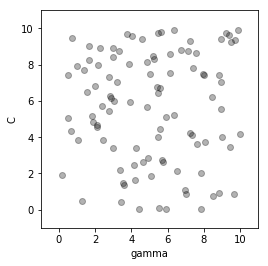

AUC for particle - 1 is 0.8057303319700742  At (gamma, c):  [8.44078513 6.20939252]
AUC for particle - 2 is 0.816766600513872  At (gamma, c):  [5.01704369 7.47300587]
AUC for particle - 3 is 0.8214561772456316  At (gamma, c):  [3.00032223 3.39462837]
AUC for particle - 4 is 0.8153367060294069  At (gamma, c):  [5.72220542 2.64111804]
AUC for particle - 5 is 0.8307665990519317  At (gamma, c):  [1.38212829 7.71869739]
AUC for particle - 6 is 0.801060444649116  At (gamma, c):  [8.95287353 9.43817536]
AUC for particle - 7 is 0.8146319309671831  At (gamma, c):  [6.12753354 8.57991532]
AUC for particle - 8 is 0.8196297314781312  At (gamma, c):  [4.27866689 3.40330167]
AUC for particle - 9 is 0.8016099382695745  At (gamma, c):  [8.51203884 0.77866956]
AUC for particle - 10 is 0.8214565515023263  At (gamma, c):  [2.98546192 8.91527633]
AUC for particle - 11 is 0.7989623733137433  At (gamma, c):  [9.47918208 9.25117531]
AUC for particle - 12 is 0.8351027722041308  At (gamma, c):  [1.00787451 7.9

AUC for particle - 99 is 0.8252104426389483  At (gamma, c):  [1.68608571 9.01376597]
AUC for particle - 100 is 0.7991305402965545  At (gamma, c):  [9.20346287 9.77225343]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 1 is [0.15846973 1.93895962] with AUC: 0.8996838671242541
The best position so far is  [0.15846973 1.93895962] in iteration number 1 with AUC: 0.8996838671242541
15.970789432525635


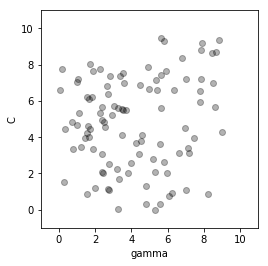

AUC for particle - 1 is 0.8061925272925964  At (gamma, c):  [7.78592121 5.93585948]
AUC for particle - 2 is 0.8216087453263597  At (gamma, c):  [2.95111448 5.21902396]
AUC for particle - 3 is 0.8229606716153343  At (gamma, c):  [2.3526057 3.0735364]
AUC for particle - 4 is 0.8166136581764488  At (gamma, c):  [5.17933216 2.81193891]
AUC for particle - 5 is 0.8341896092599294  At (gamma, c):  [1.10077303 5.31653618]
AUC for particle - 6 is 0.8065988764989456  At (gamma, c):  [7.89948139 9.20969552]
AUC for particle - 7 is 0.8203579385181042  At (gamma, c):  [3.48177684 5.54732794]
AUC for particle - 8 is 0.8193746404540786  At (gamma, c):  [4.4054767  3.07538248]
AUC for particle - 9 is 0.8140956035802915  At (gamma, c):  [6.08186738 0.77316856]
AUC for particle - 10 is 0.8217238731182088  At (gamma, c):  [2.82262961 7.38370251]
AUC for particle - 11 is 0.803177082625206  At (gamma, c):  [8.66824845 8.68024622]
AUC for particle - 12 is 0.8354097796490613  At (gamma, c):  [1.00777629 7.05

AUC for particle - 99 is 0.8340850279047839  At (gamma, c):  [1.06276742 7.1921666 ]
AUC for particle - 100 is 0.8015174003779116  At (gamma, c):  [8.84026315 9.34706566]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 2 is [0.07565984 6.60236927] with AUC: 0.9025727954855286
The best position so far is  [0.07565984 6.60236927] in iteration number 2 with AUC: 0.9025727954855286
15.404236316680908


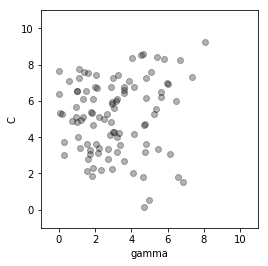

AUC for particle - 1 is 0.8138377056310283  At (gamma, c):  [6.45288649 5.98638932]
AUC for particle - 2 is 0.8231247217745029  At (gamma, c):  [2.22512082 5.12779171]
AUC for particle - 3 is 0.8231755154252967  At (gamma, c):  [2.19208833 3.38802775]
AUC for particle - 4 is 0.8172616514807626  At (gamma, c):  [4.79799631 3.64523634]
AUC for particle - 5 is 0.8375050440592231  At (gamma, c):  [0.95512732 5.68663984]
AUC for particle - 6 is 0.8176580156354506  At (gamma, c):  [4.63327064 8.59031578]
AUC for particle - 7 is 0.8222337744737929  At (gamma, c):  [2.64653523 5.30195832]
AUC for particle - 8 is 0.8208814739281237  At (gamma, c):  [3.1854935  3.99005195]
AUC for particle - 9 is 0.8198464465715674  At (gamma, c):  [4.11426187 2.01984412]
AUC for particle - 10 is 0.823864598021264  At (gamma, c):  [2.1276447  6.72827845]
AUC for particle - 11 is 0.8119739131388221  At (gamma, c):  [6.69888141 8.24014361]
AUC for particle - 12 is 0.8332695225668746  At (gamma, c):  [1.08890042 7.

AUC for particle - 99 is 0.8492317723466698  At (gamma, c):  [0.56574802 7.10216777]
AUC for particle - 100 is 0.8063685273510739  At (gamma, c):  [8.05537461 9.23521923]
The best position in iteration number 3 is [1.00000000e-04 7.67500814e+00] with AUC: 0.9258622399116988
The best position so far is  [1.00000000e-04 7.67500814e+00] in iteration number 3 with AUC: 0.9258622399116988
15.473598718643188


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


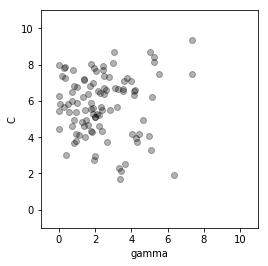

AUC for particle - 1 is 0.816639242130193  At (gamma, c):  [5.13042346 6.23026101]
AUC for particle - 2 is 0.8363298663421159  At (gamma, c):  [0.98708082 5.88352137]
AUC for particle - 3 is 0.8264580682652983  At (gamma, c):  [1.58712597 4.64773704]
AUC for particle - 4 is 0.8170586640059355  At (gamma, c):  [4.96674972 4.08835289]
AUC for particle - 5 is 0.8438195761104349  At (gamma, c):  [0.74093399 6.49455538]
AUC for particle - 6 is 0.8212778380828117  At (gamma, c):  [3.06473503 8.69712257]
AUC for particle - 7 is 0.8232970728302066  At (gamma, c):  [1.90127331 5.29486103]
AUC for particle - 8 is 0.8239407884974543  At (gamma, c):  [2.07979992 5.27601222]
AUC for particle - 9 is 0.8206515926011205  At (gamma, c):  [3.33287197 2.27555282]
AUC for particle - 10 is 0.8229465697400306  At (gamma, c):  [2.27953696 6.42744884]
AUC for particle - 11 is 0.8161931135306221  At (gamma, c):  [5.27123166 8.14738475]
AUC for particle - 12 is 0.8415198271986668  At (gamma, c):  [0.76411745 7.

AUC for particle - 98 is 0.8228206148189571  At (gamma, c):  [2.47752186 6.37069663]
AUC for particle - 99 is 0.880775559283503  At (gamma, c):  [0.16209129 7.39899397]
AUC for particle - 100 is 0.8104195607600628  At (gamma, c):  [7.32478233 9.34652977]
The best position in iteration number 4 is [1.0000000e-04 7.9586209e+00] with AUC: 0.9258360945729125
The best position so far is  [1.0000000e-04 7.9586209e+00] in iteration number 4 with AUC: 0.9258360945729125
15.091039657592773

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


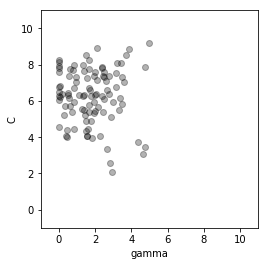

AUC for particle - 1 is 0.8208689626437726  At (gamma, c):  [3.14861561 6.77962136]
AUC for particle - 2 is 0.8488720999674718  At (gamma, c):  [0.59909144 5.71867066]
AUC for particle - 3 is 0.827960410659006  At (gamma, c):  [1.4965028  4.91683342]
AUC for particle - 4 is 0.8204089192972454  At (gamma, c):  [3.47392779 5.81479751]
AUC for particle - 5 is 0.8410214079215231  At (gamma, c):  [0.80701336 6.70362703]
AUC for particle - 6 is 0.8239409756258018  At (gamma, c):  [2.09095918 8.8959193 ]
AUC for particle - 7 is 0.8413302866499275  At (gamma, c):  [0.83699768 5.96345917]
AUC for particle - 8 is 0.823017894879189  At (gamma, c):  [1.98328897 5.44078929]
AUC for particle - 9 is 0.8216345164084514  At (gamma, c):  [2.90300155 2.06302467]
AUC for particle - 10 is 0.8225907334919539  At (gamma, c):  [2.51352212 6.10682328]
AUC for particle - 11 is 0.82083068027733  At (gamma, c):  [3.20883335 8.09860601]
AUC for particle - 12 is 0.8397448300311758  At (gamma, c):  [0.83504349 7.988

AUC for particle - 97 is 0.8236812063930645  At (gamma, c):  [1.82933914 3.92951596]
AUC for particle - 98 is 0.8265344458698362  At (gamma, c):  [1.57482043 7.29170333]
AUC for particle - 99 is 0.9257853009221186  At (gamma, c):  [1.00000000e-04 7.83090319e+00]
AUC for particle - 100 is 0.8170332671805386  At (gamma, c):  [4.95919425 9.22016009]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 5 is [1.00000000e-04 8.15488824e+00] with AUC: 0.9258868882237062
The best position so far is  [1.00000000e-04 8.15488824e+00] in iteration number 5 with AUC: 0.9258868882237062
13.71427869796753


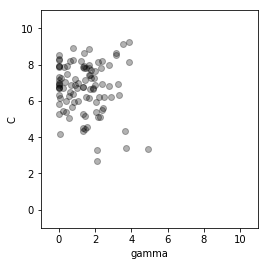

AUC for particle - 1 is 0.8247250960311979  At (gamma, c):  [1.75128779 7.25030147]
AUC for particle - 2 is 0.9005851064840703  At (gamma, c):  [0.08339425 6.18106897]
AUC for particle - 3 is 0.835411089547493  At (gamma, c):  [1.02488943 6.01946371]
AUC for particle - 4 is 0.8217238731182088  At (gamma, c):  [2.7873502  6.80268829]
AUC for particle - 5 is 0.8392596705517729  At (gamma, c):  [0.86446236 6.90248657]
AUC for particle - 6 is 0.8410845257283204  At (gamma, c):  [0.77053993 8.90521829]
AUC for particle - 7 is 0.8570675204397515  At (gamma, c):  [0.3832927  5.97365066]
AUC for particle - 8 is 0.8238380784257827  At (gamma, c):  [2.060129   5.39567297]
AUC for particle - 9 is 0.8241196890453164  At (gamma, c):  [2.07871599 2.6959755 ]
AUC for particle - 10 is 0.8231755154252967  At (gamma, c):  [2.21555515 6.23022203]
AUC for particle - 11 is 0.8237112814271462  At (gamma, c):  [2.13743671 8.13961298]
AUC for particle - 12 is 0.8406501598997108  At (gamma, c):  [0.79635733 8.

AUC for particle - 97 is 0.8340626251329452  At (gamma, c):  [1.31340113 4.34519314]
AUC for particle - 98 is 0.8248528286715714  At (gamma, c):  [1.72115312 7.41436961]
AUC for particle - 99 is 0.9257595298400272  At (gamma, c):  [1.00000000e-04 7.94200292e+00]
AUC for particle - 100 is 0.8202167589516427  At (gamma, c):  [3.85239309 9.23178875]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 6 is [1.00000000e-04 7.18371502e+00] with AUC: 0.925989785423725
The best position so far is  [1.00000000e-04 7.18371502e+00] in iteration number 6 with AUC: 0.925989785423725
13.185936689376831


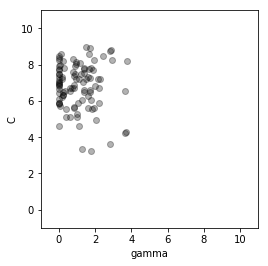

AUC for particle - 1 is 0.8280367882635439  At (gamma, c):  [1.48612871 7.20214849]
AUC for particle - 2 is 0.9248700795660962  At (gamma, c):  [1.00000000e-04 6.10606265e+00]
AUC for particle - 3 is 0.8485146731284425  At (gamma, c):  [0.60528797 6.55084588]
AUC for particle - 4 is 0.8230487184266598  At (gamma, c):  [2.25244187 7.20917131]
AUC for particle - 5 is 0.840485829048021  At (gamma, c):  [0.82123904 6.90805151]
AUC for particle - 6 is 0.8902563526784572  At (gamma, c):  [0.10153328 8.61390022]
AUC for particle - 7 is 0.9245126527270666  At (gamma, c):  [1.00000000e-04 5.87476616e+00]
AUC for particle - 8 is 0.8239109005917203  At (gamma, c):  [1.80788572 5.548917  ]
AUC for particle - 9 is 0.8346499332989777  At (gamma, c):  [1.26184731 3.33949318]
AUC for particle - 10 is 0.8261275352784448  At (gamma, c):  [1.61922258 6.24913846]
AUC for particle - 11 is 0.8312256131925485  At (gamma, c):  [1.3558746  7.83722661]
AUC for particle - 12 is 0.8405101031033336  At (gamma, c):

AUC for particle - 97 is 0.8484364242404308  At (gamma, c):  [0.62258667 5.12122701]
AUC for particle - 98 is 0.8331901509087786  At (gamma, c):  [1.20729921 7.47006257]
AUC for particle - 99 is 0.9259130335624924  At (gamma, c):  [1.00000000e-04 7.75892878e+00]
AUC for particle - 100 is 0.8216604746188905  At (gamma, c):  [2.85244094 8.82819842]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 7 is [1.00000000e-04 7.49483043e+00] with AUC: 0.9260405790745186
The best position so far is  [1.00000000e-04 7.49483043e+00] in iteration number 7 with AUC: 0.9260405790745186
12.64343810081482


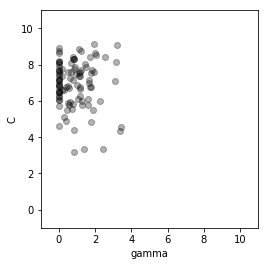

AUC for particle - 1 is 0.8474425797397016  At (gamma, c):  [0.63648057 7.28114129]
AUC for particle - 2 is 0.9247169501003257  At (gamma, c):  [1.00000000e-04 6.03528262e+00]
AUC for particle - 3 is 0.8495647380020395  At (gamma, c):  [0.55374161 6.6972361 ]
AUC for particle - 4 is 0.8232205080973213  At (gamma, c):  [1.90887533 7.58257222]
AUC for particle - 5 is 0.8355373251610875  At (gamma, c):  [0.9935682  6.85849456]
AUC for particle - 6 is 0.926114711138888  At (gamma, c):  [1.00000000e-04 8.91387096e+00]
AUC for particle - 7 is 0.9246665307062268  At (gamma, c):  [1.00000000e-04 5.72656957e+00]
AUC for particle - 8 is 0.8264072746145047  At (gamma, c):  [1.58782138 5.77245671]
AUC for particle - 9 is 0.842171937326623  At (gamma, c):  [0.83372479 3.19300395]
AUC for particle - 10 is 0.8261783289292385  At (gamma, c):  [1.61251366 6.12089917]
AUC for particle - 11 is 0.8397700397282253  At (gamma, c):  [0.83832421 7.74323027]
AUC for particle - 12 is 0.8406501598997109  At (gam

AUC for particle - 96 is 0.9258112591325577  At (gamma, c):  [1.00000000e-04 7.68914339e+00]
AUC for particle - 97 is 0.8593371943174383  At (gamma, c):  [0.39292272 4.91649228]
AUC for particle - 98 is 0.832706675584502  At (gamma, c):  [1.17334504 7.6015232 ]
AUC for particle - 99 is 0.9257597169683746  At (gamma, c):  [1.00000000e-04 7.84717319e+00]
AUC for particle - 100 is 0.820779699498189  At (gamma, c):  [3.2031054 9.0960495]
The best position in iteration number 8 is [1.0000000e-04 8.7468764e+00] with AUC: 0.9261156467806249
The best position so far is 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 [1.0000000e-04 8.7468764e+00] in iteration number 8 with AUC: 0.9261156467806249
12.436255931854248


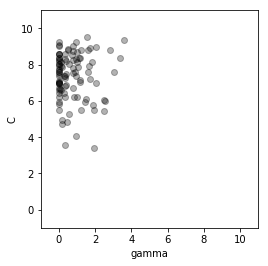

AUC for particle - 1 is 0.880953898446323  At (gamma, c):  [0.15401905 7.8533233 ]
AUC for particle - 2 is 0.9253281580649758  At (gamma, c):  [1.00000000e-04 6.59758211e+00]
AUC for particle - 3 is 0.8559436977584801  At (gamma, c):  [0.37099216 7.49695821]
AUC for particle - 4 is 0.823909777821636  At (gamma, c):  [1.817264   8.14107357]
AUC for particle - 5 is 0.8408038507505236  At (gamma, c):  [0.79516932 7.55936076]
AUC for particle - 6 is 0.926420034428692  At (gamma, c):  [1.00000000e-04 9.24120798e+00]
AUC for particle - 7 is 0.9244110654254794  At (gamma, c):  [1.0000000e-04 5.8368119e+00]
AUC for particle - 8 is 0.8275523772975305  At (gamma, c):  [1.51507226 6.09559438]
AUC for particle - 9 is 0.8674874349893461  At (gamma, c):  [0.34642702 3.58717582]
AUC for particle - 10 is 0.8233226567839508  At (gamma, c):  [1.90042176 5.78307369]
AUC for particle - 11 is 0.8484896505597405  At (gamma, c):  [0.57798654 8.01384205]
AUC for particle - 12 is 0.8416981663614868  At (gamma,

AUC for particle - 95 is 0.8815865735410751  At (gamma, c):  [0.18887685 4.95944329]
AUC for particle - 96 is 0.9258357203162176  At (gamma, c):  [1.00000000e-04 8.05197199e+00]
AUC for particle - 97 is 0.883299201415158  At (gamma, c):  [0.18232385 4.74674365]
AUC for particle - 98 is 0.835051978553337  At (gamma, c):  [1.01301669 8.12755325]
AUC for particle - 99 is 0.9258360945729125  At (gamma, c):  [1.00000000e-04 8.35807373e+00]
AUC for particle - 100 is 0.8201152652142291  At (gamma, c):  [3.58046924 9.38775383]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 9 is [1.00000000e-04 9.24120798e+00] with AUC: 0.926420034428692
The best position so far is  [1.00000000e-04 9.24120798e+00] in iteration number 9 with AUC: 0.926420034428692
12.272143363952637


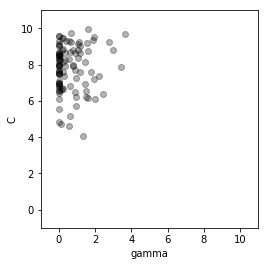

AUC for particle - 1 is 0.9258613042699619  At (gamma, c):  [1.00000000e-04 7.96874059e+00]
AUC for particle - 2 is 0.9258893208922222  At (gamma, c):  [1.00000000e-04 6.84052001e+00]
AUC for particle - 3 is 0.8594178758739662  At (gamma, c):  [0.31275249 7.92072427]
AUC for particle - 4 is 0.8262033514979406  At (gamma, c):  [1.62330039 8.75949098]
AUC for particle - 5 is 0.8414428882090866  At (gamma, c):  [0.76709553 7.98774352]
AUC for particle - 6 is 0.926699399508057  At (gamma, c):  [1.00000000e-04 9.58157078e+00]
AUC for particle - 7 is 0.9253533677620253  At (gamma, c):  [1.00000000e-04 6.61467547e+00]
AUC for particle - 8 is 0.8261019513247007  At (gamma, c):  [1.61802649 6.15295864]
AUC for particle - 9 is 0.9235955600875702  At (gamma, c):  [1.00000000e-04 4.86092557e+00]
AUC for particle - 10 is 0.828827271032751  At (gamma, c):  [1.4436618  6.94110393]
AUC for particle - 11 is 0.8591622234648715  At (gamma, c):  [0.30847986 8.62254046]
AUC for particle - 12 is 0.844990449

AUC for particle - 97 is 0.9249462700422866  At (gamma, c):  [1.00000000e-04 6.13308522e+00]
AUC for particle - 98 is 0.8405989919922224  At (gamma, c):  [0.79528806 8.81397121]
AUC for particle - 99 is 0.9259884755252933  At (gamma, c):  [1.00000000e-04 8.54791379e+00]
AUC for particle - 100 is 0.8201152652142291  At (gamma, c):  [3.64463305 9.69901008]
The best position in iteration number 10 is [1.00000000e-04 9.61242731e+00] with AUC: 0.9267249834618013
The best position so far is  [1.00000000e-04 9.61242731e+00] in iteration number 10 with AUC: 0.9267249834618013
11.897686004638672
138.1003987789154


In [10]:
particle_position_vector = np.array([np.array([random.random()*10, random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([0 for _ in range(n_particles)])
gbest_fitness_value = np.array([0])
gbest_position = np.array([float('inf'), float('inf')])
velocity_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1)))*random.random()*2,(-1) ** (bool(random.getrandbits(1))) * random.random()*2]) for _ in range(n_particles)])
#velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
start = time()
while iteration < n_iterations:
    gbest_fitness_value_cadidate = np.array([0])
    gbest_position_cadidate = np.array([float('inf'), float('inf')])
    start1 = time()
    plot(particle_position_vector)
    
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print("AUC for particle -", i+1,"is", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i])
        
        if(pbest_fitness_value[i] < fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value_cadidate < fitness_cadidate):
            gbest_fitness_value_cadidate = fitness_cadidate
            gbest_position_cadidate = particle_position_vector[i]
    print("The best position in iteration number", iteration + 1, "is", gbest_position_cadidate, "with AUC:", fitness_function(gbest_position_cadidate))
    
    if(gbest_fitness_value < gbest_fitness_value_cadidate):
        gbest_fitness_value = gbest_fitness_value_cadidate
        gbest_position = gbest_position_cadidate
    print("The best position so far is ", gbest_position, "in iteration number", iteration + 1, "with AUC:", fitness_function(gbest_position))
    
    for i in range(n_particles):
        max_velocity = np.array([10,10])
        min_velocity = np.array([-10,-10])
        max_position = np.array([10,10])
        min_position = np.array([0.0001, 0.001])
        new_velocity = khi*(velocity_vector[i] + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position_cadidate-particle_position_vector[i]))
        for j in range(0,2):
            if(new_velocity[j] > max_velocity[j]):
                new_velocity[j] = max_velocity[j]
            elif(new_velocity[j] < min_velocity[j]):
                new_velocity[j] = min_velocity[j]
            
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
        for j in range(0,2):
            if(particle_position_vector[i][j] > max_position[j]):
                particle_position_vector[i][j] = max_position[j]
            elif(particle_position_vector[i][j] < min_position[j]):
                particle_position_vector[i][j] = min_position[j]
    
    iteration = iteration + 1
    stop1 = time()
    sec = stop1-start1
    print(sec)
stop = time()
print(stop - start)
